In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from csv import DictReader

In [13]:
# Specfic to 2 dimensions
def baseline(time_remaining,separation):
    dims=2
    # a useful intermediate value used in the baseline calculations
    d_tilde = 4*D
    block = NU + 2*PHI - d_tilde
    
    def A():
        num = (BETA + PHI**2)*(1-np.exp(-time_remaining*block))
        denom = block
        return num/denom
    
    def B():
        first_term = dims * kappa * (BETA + PHI**2) / (NU*(2*PHI-d_tilde))
        second_term = 1 - np.exp(-NU*time_remaining) - NU * (1-np.exp(-time_remaining*block))/block
        return first_term*second_term
        
    
    return A()*separation**2 + B()

In [10]:
# PARAMS
A = 1.
B = 0.7
C = 0.43
NU = 0.99
kappa = 0.001
BETA = 0.1
PHI = 0.9
D = 0.1 # placeholder for now
dims = 3
delta_t = 0.05



file=f'baseline_CSVs/noise_corrected_bins_eps:{num_eps}_dt:{delta_t}_phi:{PHI}_end:{t_end}_dr:{delta_r}.csv'
# open file in read mode
with open(file, 'r') as f:
    dict_reader = DictReader(f)
    list_of_dict = list(dict_reader)

In [12]:
list_of_dict

[{'(0, 0)': '(0.0007892065810010566, 2)',
  '(1, 4)': '(0.0019511159210288168, 6)',
  '(2, 12)': '(0.0064330416933107565, 16)',
  '(3, 11)': '(0.006204348026167105, 18)',
  '(4, 19)': '(0.007021530981678276, 13)',
  '(5, 27)': '(0.014992949387356527, 21)',
  '(6, 37)': '(0.019536500979991767, 17)',
  '(7, 36)': '(0.013686312346360403, 15)',
  '(8, 39)': '(0.01867242787548197, 18)',
  '(9, 39)': '(0.020014452324203853, 18)',
  '(10, 42)': '(0.007544952093508851, 7)',
  '(11, 45)': '(0.020024906463789342, 14)',
  '(12, 42)': '(0.028784639437724222, 22)',
  '(13, 53)': '(0.018337711285277707, 9)',
  '(14, 49)': '(0.017695783881803616, 12)',
  '(15, 44)': '(0.01970032445527176, 17)',
  '(16, 41)': '(0.017635784978328593, 13)',
  '(17, 45)': '(0.025420349719434375, 19)',
  '(18, 46)': '(0.018271624731492353, 13)',
  '(19, 42)': '(0.020912271019237864, 19)',
  '(20, 40)': '(0.021670246013694997, 20)',
  '(21, 37)': '(0.024325989985463876, 24)',
  '(22, 30)': '(0.019114693395663566, 26)',
  '

In [14]:
t_end = max(tspan)
sampled = np.zeros([100,len(tspan)])
evaluated = np.zeros([100,len(tspan)])
count_threshhold = 100
for key, value in dictionary.items():
    if value[1] > count_threshhold:
        time_remaining = t_end - key[0]*delta_t
        sep = key[1]*delta_r
        sampled[key[1]][key[0]] = value[0]/value[1]
        evaluated[key[1]][key[0]] = baseline(time_remaining,sep)

NameError: name 'tspan' is not defined

NameError: name 'sampled' is not defined

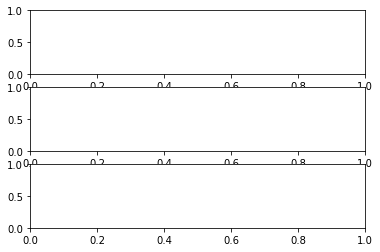

In [15]:
fig, ax = plt.subplots(3, 1) 
scale = ax[0].imshow(np.flip(sampled,axis=0), interpolation='nearest', extent = [0 , sampled.shape[1]*delta_t,0,delta_r*sampled.shape[0]], aspect=10)
scale2 = ax[1].imshow(np.flip(evaluated,axis=0), interpolation='nearest', extent = [0 , sampled.shape[1]*delta_t,0,delta_r*sampled.shape[0]], aspect=10)
scale3 = ax[2].imshow(np.flip((evaluated-sampled),axis=0), interpolation='nearest', extent = [0 , sampled.shape[1]*delta_t,0,delta_r*sampled.shape[0]], aspect=10)
fig.set_size_inches(15,6)
fig.colorbar(scale, ax=ax[0])
fig.colorbar(scale2, ax=ax[1])
fig.colorbar(scale3, ax=ax[2])

ax[0].set_xlabel('time')
ax[0].set_ylabel('seperation')
ax[0].set_title("observed")

ax[1].set_xlabel('time')
ax[1].set_ylabel('seperation')
ax[1].set_title("predicted")

ax[2].set_xlabel('time')
ax[2].set_ylabel('seperation')
ax[2].set_title("difference")
plt.ylim(0.,0.15)